In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [14]:
regressor.predict([[6.5]])

array([150000.])

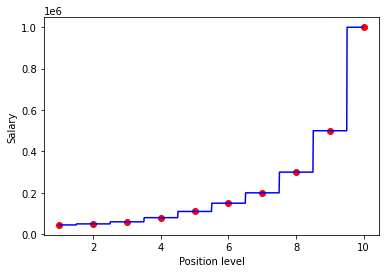

In [15]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [16]:
# activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [17]:
%%R
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

In [18]:
%%R
install.packages('caTools')
library(caTools)
set.seed(458)
split = sample.split(dataset$Salary, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/caTools_1.18.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 64984 bytes (63 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [20]:
%%R
training_set = scale(training_set)
test_set = scale(test_set)


install.packages('rpart')
library(rpart)
regressor = rpart(formula = Salary ~ .,
                  data = dataset,
                  control = rpart.control(minsplit = 1))

# Predicting a new results
y_pred = predict(regressor, data.frame(Level = 6.5))
print(y_pred)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/rpart_4.1-15.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 639286 bytes (624 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

     1 
250000 


# Random forest


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)
regressor.predict([[6.5]])

array([167000.])

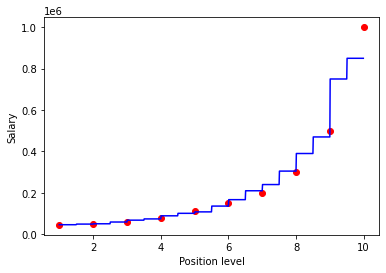

In [22]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [29]:
%%R
# Random Forest Regression

dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

install.packages('caTools')
library(caTools)
set.seed(458)
split = sample.split(dataset$Salary, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

install.packages('randomForest')
library(randomForest)
set.seed(18)
regressor = randomForest(x = dataset[-2],
                         y = dataset$Salary,
                         ntree = 450)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/caTools_1.18.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 64984 bytes (63 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [30]:
%%R

y_pred = predict(regressor, data.frame(Level = 6.5))
print(y_pred)

       1 
162604.3 
